In [1]:
%pylab inline
import pandas as pd
import json

import seaborn as sns 

all_together=pd.DataFrame.from_csv("de/all_labour.csv", sep='\t', encoding='utf-8')

Populating the interactive namespace from numpy and matplotlib


In [12]:
all_together["m_ratio"]=all_together.apply(lambda x: x[u'Männer']/100.0, axis=1)
all_together

,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name,f_name,m_ratio
0,"Obj.Pers.Brandschutz,Arbeitssicherh(ssT)",37.700505,5318,53182,62.299495,8915.0,Hilfspolizist,Politesse,0.622995
1,"Musik-,Gesangs-, Dirigententätigk. (ssT)",35.508637,9418,94183,64.491363,521.0,Audiodesigner,Audiodesignerin,0.644914
2,"Aufsicht,Führung-TheaterFilm,Fernsehprod",40.187288,9449,94494,59.812712,5019.0,Filmgeschäftsführer,Filmgeschäftsführerin,0.598127
3,Führung - Allgemeinbildende Schulen,62.997543,8419,84194,37.002457,2035.0,Direktor,Direktrice,0.370025
4,Berufe für Post- und Zustelldienste,47.894039,5132,51321,52.105961,205963.0,Bote,Botin,0.521060
5,Angehörige gesetzgebender Körperschaften,18.156809,7121,71214,81.843191,2908.0,Bundeskanzler,Bundeskanzlerin,0.818432
6,Berufe in der Gemeindearbeit,58.613996,8332,83323,41.386004,10303.0,Diakon,Diakonin,0.413860
7,"Berufe Informations,Telekommunikationst.",11.438161,2631,26313,88.561839,191884.0,Medientechniker,Medientechnikerin,0.885618
8,"Berufe Informations,Telekommunikationst.",11.438161,2631,26313,88.561839,191884.0,Projektassistent,Projektassistentin,0.885618
9,"Angehörige geistl. Orden, Mutterhäuser",62.571104,8333,83332,37.428896,879.0,Mönch,Nonne,0.374289


In [39]:
about_pages=pd.read_csv('de/all_data_bias_labour_gender_all_persons.csv',sep='\t', encoding='utf-8',index_col=0)#885
df=about_pages
df.male_amount.fillna(0, inplace=True)
df.female_amount.fillna(0, inplace=True)
df.rename(columns={"male_person_amount":"male_links","female_person_amount":"female_links",
                    "male_amount":"male_polyglot","female_amount":"female_polyglot"},inplace=True)
df=df[(df.male_all_amount>0)| (df.female_all_amount>0)]#411
about_pages=pd.read_csv('de/all_data_bias_labour_gender.csv',sep='\t', encoding='utf-8',index_col=0)
df["labor_market_women_ratio"]=df.apply(lambda x: about_pages.loc[x.profession,"labor_market_woman"],axis=1)
df.loc[:,"m_mentioned_ratio"]=df.apply(lambda x:float(x["male_all_amount"])/float(x["male_all_amount"]+x["female_all_amount"]),axis=1)
df

,male_links,all_link,lead,text,male_person,female_person,female_links,Bias,prof_gender,labor_market_domin,...,male,female_polyglot,female,male_polyglot,male_all,female_all,male_all_amount,female_all_amount,labor_market_women_ratio,m_mentioned_ratio
Abfallbeauftragter,0,"[Unternehmer, Kreislaufwirtschaft, Abfallbesei...",Ein Abfallbeauftragter oder Betriebsbeauftragt...,Ein Abfallbeauftragter oder Betriebsbeauftragt...,[],[],0,male,male,male,...,"[Schmidt, Stephan, Erich]",0.0,[],3.0,"[Schmidt, Stephan, Erich]",[],3,0,26.126126,1.000000
Abt,4,"[Kirchliche_Heraldik, Galero, Chorkleidung, Ha...","Ein Abt (von spätlat. abbas, aus aram. abba „V...","Ein Abt (von spätlat. abbas, aus aram. abba „V...","[Karl_Martell, Leo_X., Franz_I._(Frankreich), ...",[],0,male,male,female,...,"[Leo XIII, Papst Leo X, Schmitt, Karl Martell,...",1.0,[Martina Wiech],5.0,"[Karl Martell, Leo XIII, Leo X, Franz I, Schmitt]",[Martina Wiech],5,1,62.571104,0.833333
Altenpflegehelfer,0,"[Hessen, Nordrhein-Westfalen, Baden-Württember...",Altenpflegehilfe mit der Berufsbezeichnung Alt...,Altenpflegehilfe mit der Berufsbezeichnung Alt...,[],[],0,male,male,female,...,"[Thomas Klie, Robert, Bernd Hein]",1.0,[Virginia Guerra],3.0,"[Thomas Klie, Robert, Bernd Hein]",[Virginia Guerra],3,1,85.089472,0.750000
Altenpfleger,0,"[Ambulante_Pflege, Häusliche_Krankenpflege, So...",Altenpfleger und Altenpflegerinnen pflegen und...,Altenpfleger und Altenpflegerinnen pflegen und...,[],[],0,male,male,female,...,"[Manfred Engl, Frank Drieschner]",3.0,"[Brigitte Zellhuber, Annette Riedel, Sonja Sch...",2.0,"[Manfred Engl, Frank Drieschner]","[Brigitte Zellhuber, Annette Riedel, Sonja Sch...",2,3,85.089472,0.400000
Angestellter,7,"[Arbeitnehmer, Arbeiter, Arbeitsrecht, Sozialr...","Ein Angestellter, auch Privatangestellter, ist...","Ein Angestellter, auch Privatangestellter, ist...","[Fritz_Croner, Michel_Crozier, Arnd_Zschiesche...",[Irmgard_Keun],1,male,male,NaN,...,"[Ulf Kadritzke, Fritz Croner, Ruprecht, Charle...",3.0,"[Lang, Irmgard, Tatjana Timoschenko]",14.0,"[Ulf Kadritzke, Fritz Croner, Ruprecht, Charle...","[Irmgard Keun, Lang, Tatjana Timoschenko]",14,3,NaN,0.823529
Anwendungsprogrammierer,0,"[Programmierer, Anwendungsprogramm, Customizin...","Anwendungsprogrammierer sind Programmierer, di...","Anwendungsprogrammierer sind Programmierer, di...",[],[],0,male,male,male,...,[Springer Gabler],0.0,[],1.0,[Springer Gabler],[],1,0,13.505193,1.000000
Anästhesietechnischer Assistent,0,"[Ausbildungsberuf, Gesundheits-_und_Krankenpfl...",Die Berufsgruppe Anästhesietechnische(r) Assis...,Die Berufsgruppe Anästhesietechnische(r) Assis...,[],[],0,male,male,female,...,"[Martin Bauer, Florian Eckert]",1.0,[Robin Rüsenberg],2.0,"[Martin Bauer, Florian Eckert]",[Robin Rüsenberg],2,1,77.728520,0.666667
Apotheker,20,"[Léo_Apotheker, Arzneimittel, Bundes-Apotheker...",Apotheker sind Fachkräfte für Arzneimittel. Si...,Apotheker sind Fachkräfte für Arzneimittel. Si...,"[Léo_Apotheker, Friedrich_II._(HRR), Friedrich...",[Magdalena_Meub],1,neutral,male,female,...,"[Franz - Josef Kuhlen, Christoph Friedrich, Jo...",1.0,[Magdalena Meub],26.0,"[Friedrich II, August Oetker, Emanuel Merck, C...",[Magdalena Meub],29,1,83.810209,0.966667
Arbeitsvermittler,0,"[Bundesagentur_für_Arbeit, Jobcenter, Öffentli...",Die Tätigkeit eines Arbeitsvermittlers ist auf...,Die Tätigkeit eines Arbeitsvermittlers ist auf...,[],"[Henriette_Heber, Christine_Rädlinger]",2,male,male,female,...,"[Jonas F. Puck, Holger Schütze, Anders, Oliver...",1.0,[Henriette Heber],5.0,"[Jonas F. Puck, Holger Schütze, Anders, Oliver...","[Henriette Heber, Christine Rädlinger]",5,2,66.396415,0.714286
Architekt,2,"[Erz-, Gebäude, Bauwerk, Hochbau, Architektur,...","Der Architekt (griech. ἀρχιτέκτων architékton,...","Der Architekt (griech. ἀρχιτέκτων architékton,...","[Eugène_Viollet-le-Duc, Vitruv]",[],0,male,male,male,...,"[Hanno Wolfensberger, Michael O’Shea, Günther ...",7.0,"[Tanja Kullack, Kristina Lowis, Ulrike Eichhor...",11.0,"[Eug

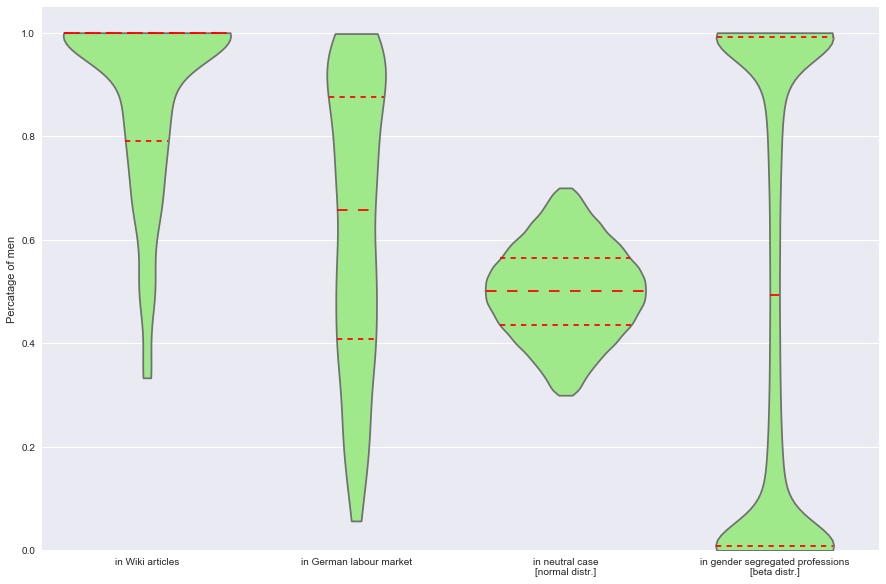

In [151]:
def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
dff_df=reject_outliers2(all_together.m_ratio.values)
dff_df=pd.DataFrame(dff_df, columns=["m_normalized"])

dff_mentioned=pd.DataFrame(reject_outliers2(df.m_mentioned_ratio.values), columns=["m_mentioned_ratio"])

std_2=all_together.m_ratio.std()*2
mean_m=all_together.m_ratio.mean()
df1=all_together[ abs(all_together.m_ratio - mean_m)<std_2]["m_ratio"]

#df_all_subgroups=pd.read_csv("de/labourmarket_subgroups.csv",sep='\t', encoding='utf-8',index_col=0)
#df_all_subgroups["f_ratio"]=df_all_subgroups.apply(lambda x: 1.0-x[u'Frauen_ratio']/100.0, axis=1)
#df_all_subgroups=pd.DataFrame(df_all_subgroups.f_ratio.values, columns=["f_ratio"])
#df_all_subgroups=pd.DataFrame(reject_outliers2(df_all_subgroups.f_ratio.values), columns=["f_ratio"])
L =np.random.normal(0.5, 0.1, 100000)
#L_new=L[(L>0.45)& (L<0.55)]
#df_hyp2=pd.DataFrame(reject_outliers2(L_new), columns=["m_hypoth2"])
df_hyp=pd.DataFrame(reject_outliers2(L), columns=["m_hypoth"])
B=np.random.beta(0.15, 0.15, size=100000)
df_hyp2=pd.DataFrame(reject_outliers2(B), columns=["m_hypoth2"])
dff=pd.concat([dff_mentioned,dff_df,df_hyp,df_hyp2],axis=1)


plt.subplots(figsize=(15, 10))

g=sns.violinplot(data=dff[["m_mentioned_ratio","m_normalized","m_hypoth","m_hypoth2"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])


plt.xticks([0,1,2,3],["in Wiki articles", "in German labour market",
                    "in neutral case\n[normal distr.]","in gender segregated professions\n[beta distr.]"])
#, "in neutral case\n[uniform. from 0.45 to 0.55]"])
#,"in German labour market\n[all professions]"])

plt.ylabel("Percatage of men")
plt.ylim(0,1.05)

plt.savefig("de/plots/violin_hypothetical.png",dpi=500, bbox_inches='tight')
plt.show()

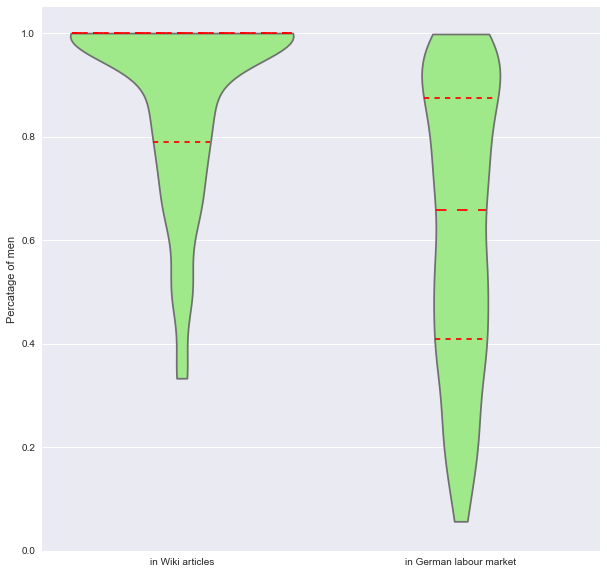

In [156]:
plt.subplots(figsize=(10, 10))
g=sns.violinplot(data=dff[["m_mentioned_ratio","m_normalized"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])


plt.xticks([0,1],["in Wiki articles", "in German labour market"])
#, "in neutral case\n[uniform. from 0.45 to 0.55]"])
#,"in German labour market\n[all professions]"])

plt.ylabel("Percatage of men")
plt.ylim(0,1.05)

plt.savefig("de/plots/violin_labour.png",dpi=500, bbox_inches='tight')
plt.show()

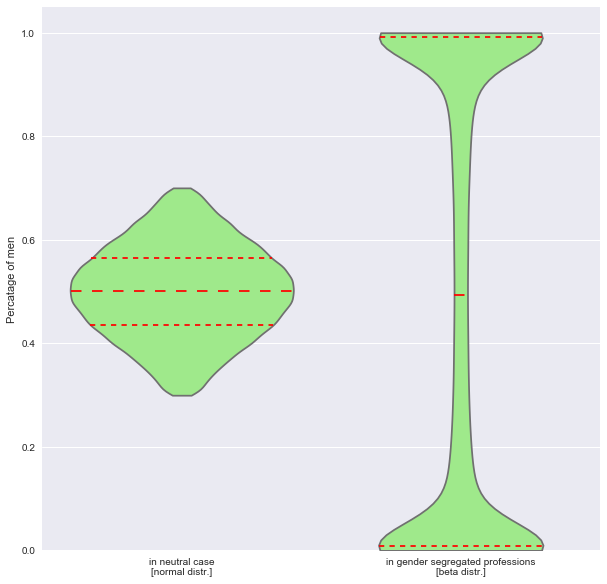

In [158]:
plt.subplots(figsize=(10, 10))
g=sns.violinplot(data=dff[["m_hypoth","m_hypoth2"]],cut=0,trim=True,inner="quartile",
                 palette=[sns.xkcd_rgb["light green"]])


plt.xticks([0,1],["in neutral case\n[normal distr.]","in gender segregated professions\n[beta distr.]"])
#, "in neutral case\n[uniform. from 0.45 to 0.55]"])
#,"in German labour market\n[all professions]"])

plt.ylabel("Percatage of men")
plt.ylim(0,1.05)

plt.savefig("de/plots/violin_onlyhypoth.png",dpi=500, bbox_inches='tight')
plt.show()